<a href="https://colab.research.google.com/github/appliedcode/mthree-c422/blob/mthree-422-srilatha/filters_method_mutual.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import mutual_info_classif
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)  # Feature matrix
y = data.target                                          # Target vector

# Mutual Information Feature Scores
mi_scores = mutual_info_classif(X, y, random_state=42)

# Create and sort dataframe of MI scores
df_mi = pd.DataFrame({
    'feature': X.columns,
    'MI_score': mi_scores
}).sort_values('MI_score', ascending=False)

print(df_mi)

             feature  MI_score
2  petal length (cm)  0.992573
3   petal width (cm)  0.985643
0  sepal length (cm)  0.511365
1   sepal width (cm)  0.299424


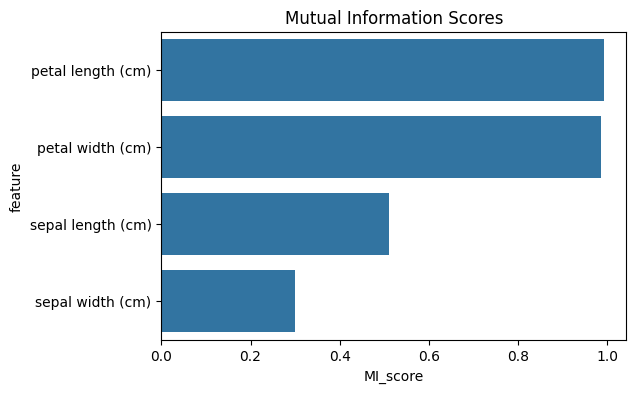

In [ ]:

# 3.3 Plot
plt.figure(figsize=(6,4))
sns.barplot(x='MI_score', y='feature', data=df_mi)
plt.title('Mutual Information Scores')
plt.show()

In [ ]:

from sklearn.feature_selection import SelectKBest, f_classif
selector = SelectKBest(score_func=f_classif, k='all')
X_new = selector.fit_transform(X, y)

anova_df = pd.DataFrame({
    'feature': X.columns,
    'F_score': selector.scores_
})

In [ ]:
mi_scores = mutual_info_classif(X, y)
df_mi = pd.DataFrame({
    'feature': X.columns,
    'MI_score': mi_scores
})

In [ ]:
merged = anova_df.merge(df_mi, on='feature')
print(merged.sort_values(['F_score','MI_score'], ascending=False))

             feature      F_score  MI_score
2  petal length (cm)  1180.161182  0.986809
3   petal width (cm)   960.007147  0.981476
0  sepal length (cm)   119.264502  0.480475
1   sepal width (cm)    49.160040  0.265913


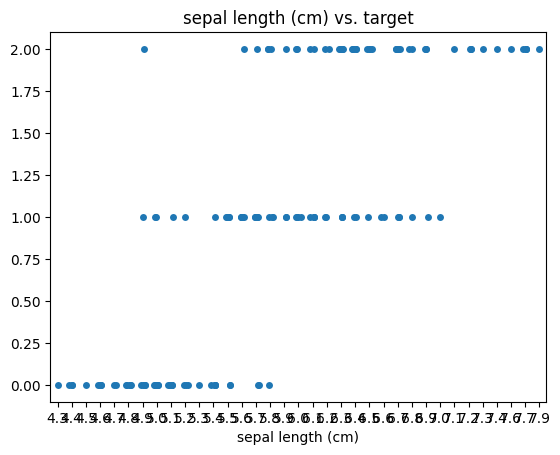

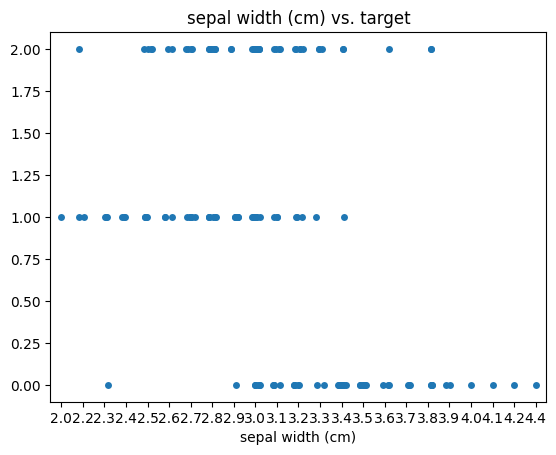

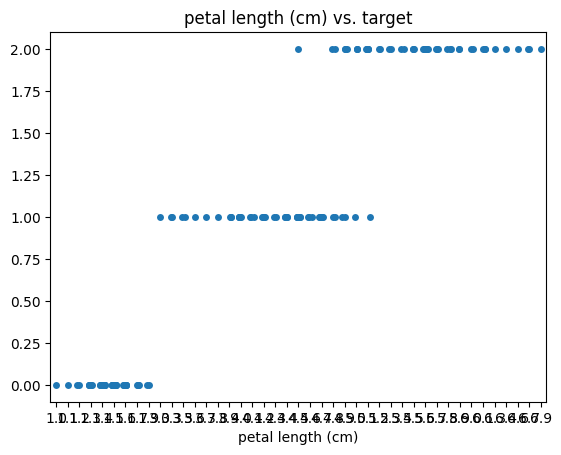

In [ ]:
for feat in df_mi['feature'][:3]:
    sns.stripplot(x=X[feat], y=y, jitter=0.2)
    plt.title(f"{feat} vs. target")
    plt.show()
